# Video games sales analysis
*Summarizing the top games, platforms, publishers, genres for different regions.*

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [153]:
vgs = pd.read_csv(r'C:\Users\Acer\Downloads\Study\Data Sets\VideoGamesSales.csv')
vgs.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [154]:
list(vgs.Genre.unique())

['Sports',
 'Platform',
 'Racing',
 'Role-Playing',
 'Puzzle',
 'Misc',
 'Shooter',
 'Simulation',
 'Action',
 'Fighting',
 'Adventure',
 'Strategy']

In [155]:
vgs.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

##### *Features 'Year' & 'Publisher' have missing values. Hence we shall treat them accordingly'*

In [156]:
# Year
vgs['Year'].fillna(vgs['Year'].quantile(0.50), inplace=True)

In [173]:
# Publisher
vgs['Publisher'].dropna(inplace=True)

In [158]:
# check for duplicate rows
duplicateRows = vgs[vgs.duplicated()]
duplicateRows

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


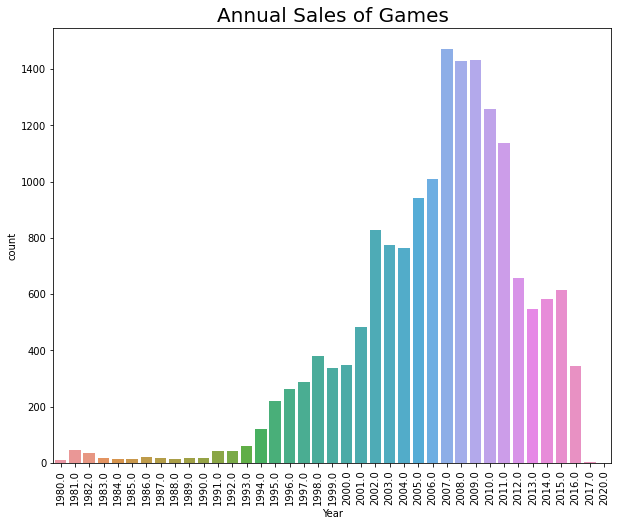

In [159]:
# plot of annual sales 
plt.figure(figsize=(10,8))
sns.countplot(x='Year',data=vgs)
plt.xticks(rotation=90)
plt.title("Annual Sales of Games", fontsize=20)
plt.show()

##### *It is observed that video games sales peaked during 2007-09*

### Region which has performed the best in terms of sales

In [160]:
x = (vgs['NA_Sales'].mean()*1000000) # Taking average of sales
y = (vgs['EU_Sales'].mean()*1000000)
z = (vgs['JP_Sales'].mean()*1000000)
s = (vgs['Other_Sales'].mean()*1000000)
t = (vgs['Global_Sales'].mean()*1000000)

In [161]:
print("The average sales in North America =", (f"${x:,.3f}"))#comma separated values till 3 decimal place and $ sign
print("The average sales in Europe =",(f"${y:,.3f}"))
print("The average sales in Japan =",(f"${z:,.3f}"))
print("The average sales in Others =",(f"${s:,.3f}"))
print("The average sales in Global =",(f"${t:,.3f}"))

The average sales in North America = $264,667.430
The average sales in Europe = $146,652.006
The average sales in Japan = $77,781.660
The average sales in Others = $48,063.020
The average sales in Global = $537,440.656


In [162]:
# regional sales grouped by platform
data1 = pd.DataFrame(vgs.groupby("Platform")[["NA_Sales"]].sum().sort_values(by=['NA_Sales'],ascending=[False]).reset_index())
data1.rename(columns = {'Platform':'Platform_NA'}, inplace = True)
data2 = pd.DataFrame(vgs.groupby("Platform")[["EU_Sales"]].sum().sort_values(by=['EU_Sales'],ascending=[False]).reset_index())
data2.rename(columns = {'Platform':'Platform_EU'}, inplace = True)
data3 = pd.DataFrame(vgs.groupby("Platform")[["JP_Sales"]].sum().sort_values(by=['JP_Sales'],ascending=[False]).reset_index())
data3.rename(columns = {'Platform':'Platform_JP'}, inplace = True)
data4 = pd.DataFrame(vgs.groupby("Platform")[["Other_Sales"]].sum().sort_values(by=['Other_Sales'],ascending=[False]).reset_index())
data4.rename(columns = {'Platform':'Platform_Other'}, inplace = True)
data5= pd.DataFrame(vgs.groupby("Platform")[["Global_Sales"]].sum().sort_values(by=['Global_Sales'],ascending=[False]).reset_index())
data5.rename(columns = {'Platform':'Platform_Global'}, inplace = True)
all_data = pd.concat([data1,data2,data3,data4,data5], axis=1)
all_data

,Platform_NA,NA_Sales,Platform_EU,EU_Sales,Platform_JP,JP_Sales,Platform_Other,Other_Sales,Platform_Global,Global_Sales
0,X360,601.05,PS3,343.71,DS,175.57,PS2,193.44,PS2,1255.64
1,PS2,583.84,PS2,339.29,PS,139.82,PS3,141.93,X360,979.96
2,Wii,507.71,X360,280.58,PS2,139.20,X360,85.54,PS3,957.84
3,PS3,392.26,Wii,268.38,SNES,116.55,Wii,80.61,Wii,926.71
4,DS,390.71,PS,213.60,NES,98.65,DS,60.53,DS,822.49
5,PS,336.51,DS,194.65,3DS,97.35,PS4,43.36,PS,730.66
6,GBA,187.54,PC,139.68,GB,85.12,PSP,42.19,GBA,318.50
7,XB,186.69,PS4,123.70,PS3,79.99,PS,40.91,PSP,296.28
8,N64,139.02,GBA,75.25,PSP,76.79,PC,24.86,PS4,278.10
9,GC,133.46,PSP,68.25,Wii,69.35,3DS,12.63,PC,258.82


### Top 10 games sold

In [163]:
top = pd.DataFrame(vgs.groupby("Name")[["Global_Sales"]].sum().sort_values(by=['Global_Sales'],ascending=[False]).reset_index())
top.head(10)

,Name,Global_Sales
0,Wii Sports,82.74
1,Grand Theft Auto V,55.92
2,Super Mario Bros.,45.31
3,Tetris,35.84
4,Mario Kart Wii,35.82
5,Wii Sports Resort,33.00
6,Pokemon Red/Pokemon Blue,31.37
7,Call of Duty: Black Ops,31.03
8,Call of Duty: Modern Warfare 3,30.83
9,New Super Mario Bros.,30.01


### Top games according to regions

In [164]:
name2 = pd.DataFrame(vgs.groupby("Name")[["NA_Sales"]].mean().sort_values(by=['NA_Sales'],ascending=[False]).reset_index())
name2.rename(columns = {'Name':'Name_NA'}, inplace = True)

name3 = pd.DataFrame(vgs.groupby("Name")[["EU_Sales"]].mean().sort_values(by=['EU_Sales'],ascending=[False]).reset_index())
name3.rename(columns = {'Name':'Name_EU'}, inplace = True)

name4 = pd.DataFrame(vgs.groupby("Name")[["JP_Sales"]].mean().sort_values(by=['JP_Sales'],ascending=[False]).reset_index())
name4.rename(columns = {'Name':'Name_JP'}, inplace = True)

name5 = pd.DataFrame(vgs.groupby("Name")[["Other_Sales"]].mean().sort_values(by=['Other_Sales'],ascending=[False]).reset_index())
name5.rename(columns = {'Name':'Name_other'}, inplace = True)

#Concatenating the results.
all_name=pd.concat([name2,name3,name4,name5],axis=1)
all_name.head(10)

,Name_NA,NA_Sales,Name_EU,EU_Sales,Name_JP,JP_Sales,Name_other,Other_Sales
0,Wii Sports,41.490,Wii Sports,29.02,Pokemon Red/Pokemon Blue,10.22,Wii Sports,8.46
1,Duck Hunt,26.930,Mario Kart Wii,12.88,Pokemon Gold/Pokemon Silver,7.20,Gran Turismo 4,7.53
2,Super Mario Bros.,16.240,Wii Sports Resort,11.01,New Super Mario Bros.,6.50,Mario Kart Wii,3.31
3,Mario Kart Wii,15.850,Nintendogs,11.00,Pokemon Diamond/Pokemon Pearl,6.04,Wii Sports Resort,2.96
4,Wii Sports Resort,15.750,Brain Age: Train Your Brain in Minutes a Day,9.26,Pokemon Black/Pokemon White,5.65,New Super Mario Bros.,2.90
5,Kinect Adventures!,14.970,New Super Mario Bros.,9.23,Pokemon Ruby/Pokemon Sapphire,5.38,Wii Play,2.85
6,New Super Mario Bros. Wii,14.590,Wii Play,9.20,Animal Crossing: Wild World,5.33,Nintendogs,2.75
7,Wii Play,14.030,Pokemon Red/Pokemon Blue,8.89,Brain Age 2: More Training in Minutes a Day,5.32,Grand Theft Auto: San Andreas,2.68
8,Tetris,13.085,Wii Fit Plus,8.59,Monster Hunter Freedom 3,4.87,New Super Mario Bros. Wii,2.26
9,New Super Mario Bros.,11.380,Wii Fit,8.03,New Super Mario Bros. Wii,4.70,Wii Fit,2.15


### Percentage of top 10 selling games region wise

Text(0.5, 1.0, 'Best selling games in Japan')

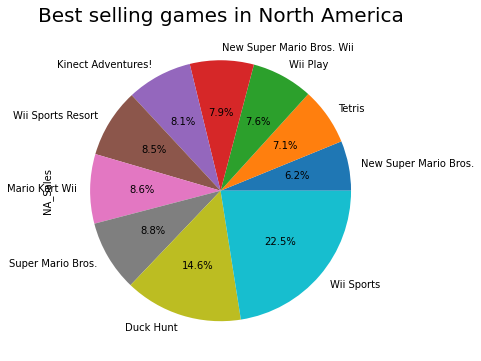

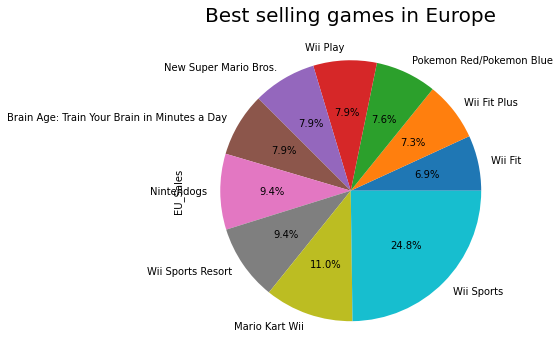

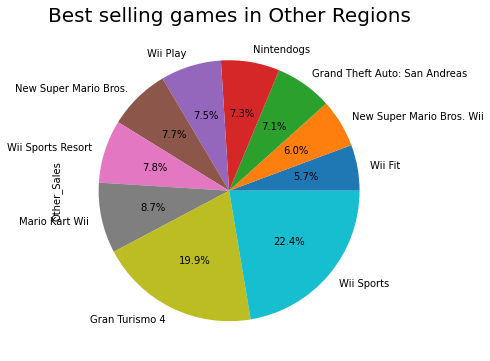

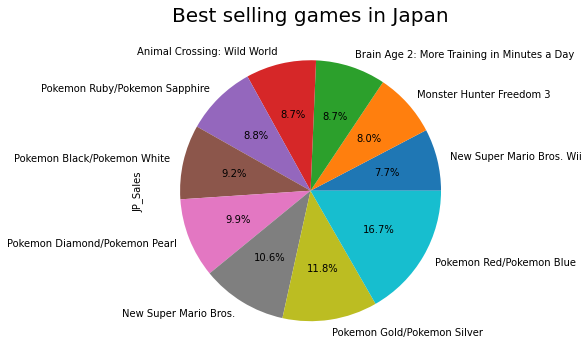

In [165]:
# Top selling games on average... 

# For North America
df1 = pd.DataFrame(vgs.groupby('Name')['NA_Sales'].mean())
df1.sort_values(by=['NA_Sales'], inplace=True)
df1 = df1.tail(10)
df1.plot.pie(y='NA_Sales', autopct='%1.1f%%', figsize=(6, 6))
leg = plt.legend()
leg.remove()
plt.title("Best selling games in North America", fontsize=20)

# For Europe Sales
df1 = pd.DataFrame(vgs.groupby('Name')['EU_Sales'].mean())
df1.sort_values(by=['EU_Sales'], inplace=True)
df1 = df1.tail(10)
df1.plot.pie(y='EU_Sales', autopct='%1.1f%%', figsize=(6, 6))
leg = plt.legend()
leg.remove()
plt.title("Best selling games in Europe",fontsize=20)

# For Other Sales
df1 = pd.DataFrame(vgs.groupby('Name')['Other_Sales'].mean())
df1.sort_values(by=['Other_Sales'], inplace=True)
df1 = df1.tail(10)
df1.plot.pie(y='Other_Sales', autopct='%1.1f%%', figsize=(6, 6))
leg = plt.legend()
leg.remove()
plt.title("Best selling games in Other Regions",fontsize=20)

# For Japan Sales
df1 = pd.DataFrame(vgs.groupby('Name')['JP_Sales'].mean())
df1.sort_values(by=['JP_Sales'], inplace=True)
df1 = df1.tail(10)
df1.plot.pie(y='JP_Sales', autopct='%1.1f%%', figsize=(6, 6))
leg = plt.legend()
leg.remove()
plt.title("Best selling games in Japan",fontsize=20)

### Top 10 Platforms, Genres & Publishers

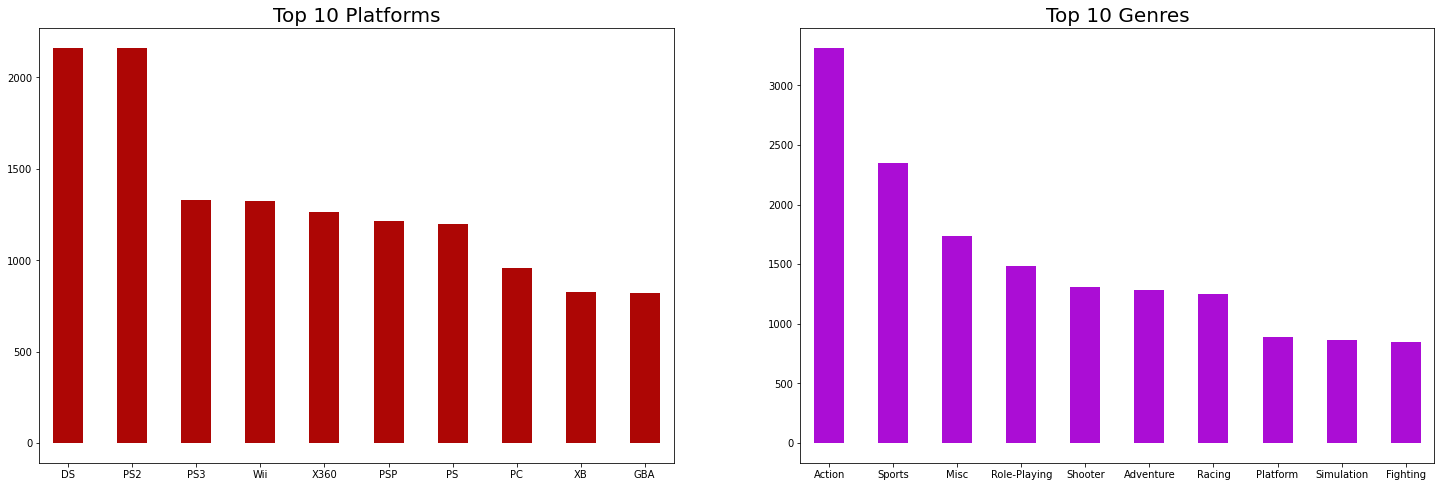

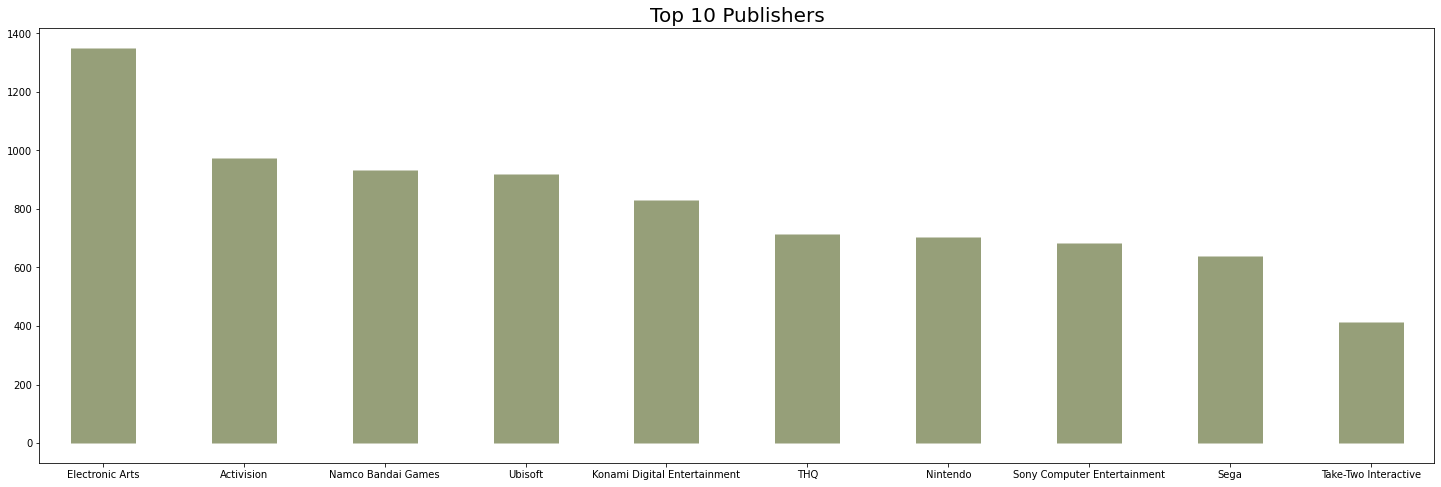

In [166]:
#top platforms (name of the platform,total number of games developed for that platform)
topPlatforms_index = vgs.Platform.value_counts().head(10).index
topPlatforms_values = vgs.Platform.value_counts().head(10).values

#top genres (name of the genre,total number of games developed in that genre)
topGenres_index = vgs.Genre.value_counts().head(10).index
topGenres_values = vgs.Genre.value_counts().head(10).values

#top game developers/publishers (name of the publisher,total number of games published by that publisher)
topPublisher_index = vgs.Publisher.value_counts().head(10).index
topPublisher_values = vgs.Publisher.value_counts().head(10).values

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(25,8), facecolor='white')
##top platforms used for games
ax1.vlines(x=topPlatforms_index, ymin=0, ymax=topPlatforms_values, color='#AD0605', linewidth=30)
ax1.set_title('Top 10 Platforms',fontsize=20)

#top genres of Games accordingly
ax2.vlines(x=topGenres_index, ymin=0, ymax=topGenres_values, color='#AB0DD5', linewidth=30)
ax2.set_title('Top 10 Genres',fontsize=20)

fig, ax = plt.subplots(figsize=(25,8), facecolor='white')
#top publishers of the games
ax.vlines(x=topPublisher_index, ymin=0, ymax=topPublisher_values, linewidth=65, color='#969F79')
ax.set_title('Top 10 Publishers',fontsize=20)
plt.show()

#### *Observations from the above Bar Graphs are :*

- *DS and PS2 are the most popular platforms in comparison to other platforms*
- *Action is the most popular genre and the second most is the sports*
- *Electronic Arts has published 1300+ products*

### Games released before 2000 that continue to register high sales

In [167]:
old_games = pd.DataFrame(vgs.query('Year<2000', inplace=False))
# first segregate the Year less than 2000 from the rest of the dataframe.
# (query() is a filtering function that enables selection and filtering 
# of columns of a dataFrame with a boolean expression.)
og = old_games['Global_Sales'] # Chose column 'Global Sales' 
np.percentile(og, [99]) 
# We will target the data exceeding the 99th percentile to get only the games 
# making the highest sales

array([7.8235])

##### *Let's consider global sales greater than 7.82 million as high and proceed with the analysis. Here, we have only targeted those games which makes global sales of more than 7.82 million.*

In [168]:
old_games.query('Global_Sales>7.8235', inplace=False)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
18,19,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61
21,22,Super Mario Land,GB,1989.0,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14
22,23,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
30,31,Pokémon Yellow: Special Pikachu Edition,GB,1998.0,Role-Playing,Nintendo,5.89,5.04,3.12,0.59,14.64
46,47,Super Mario 64,N64,1996.0,Platform,Nintendo,6.91,2.85,1.91,0.23,11.89


#### *Super Mario Bros. released in 1985 is the top old game still making global sales of $40.24 million. This is followed by Pokemon Red/Pokemon Blue (1996), Tetris (1989) and more.*

### Top gaming genres having high sales

In [169]:
genre_df = vgs.groupby("Genre")[["Global_Sales"]].sum().sort_values(by=['Global_Sales'],ascending=[False])
genre_df 

,Global_Sales
Genre,
Action,1751.18
Sports,1330.93
Shooter,1037.37
Role-Playing,927.37
Platform,831.37
Misc,809.96
Racing,732.04
Fighting,448.91
Simulation,392.20


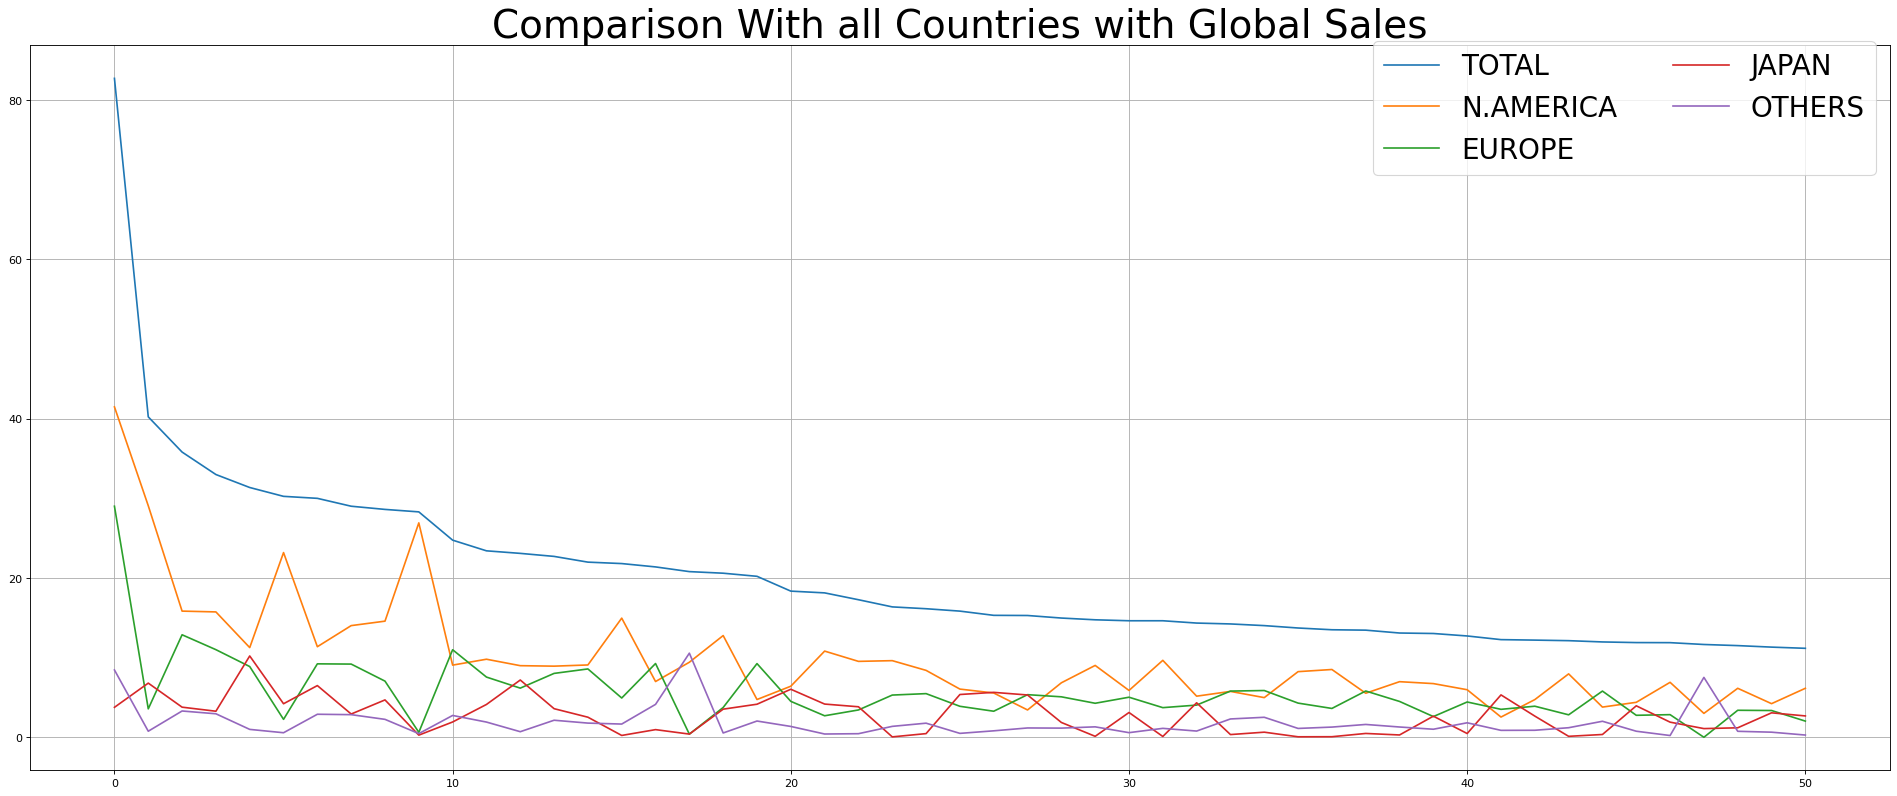

In [170]:
vgs_plot50 = vgs[0:51] # Top 50 rows

plt.figure(figsize=(30,12), dpi= 80)
plt.grid(True)
plt.title('Comparison With all Countries with Global Sales', fontsize=35)

plt.plot(vgs_plot50.Global_Sales, label = 'TOTAL')
plt.plot(vgs_plot50.NA_Sales, label = 'N.AMERICA')
plt.plot(vgs_plot50.EU_Sales, label = 'EUROPE')
plt.plot(vgs_plot50.JP_Sales, label = 'JAPAN')
plt.plot(vgs_plot50.Other_Sales, label = 'OTHERS')
plt.legend(bbox_to_anchor =(1.0, 1.025), ncol = 2,fontsize=25)

##### *North America has the highest sales followed by Europe, Japan & Others respectively*

<AxesSubplot:>

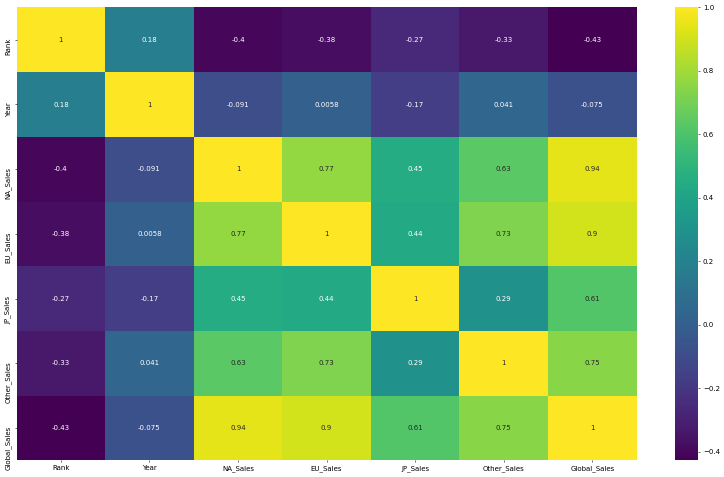

In [171]:
plt.figure(figsize=(20,12), dpi=50)
sns.heatmap(vgs.corr('pearson'), annot=True, cmap='viridis')

#### *We Observe that...*
- *That there is a strong correlation between NA_Sales and Global_Sales*
- *There also exists a relationship between EU_Sales and Global_Sales*

### *Conclusions:*

1. North America is the top region has the highest average sales of 264,667.430 Million.
2. The most preferred platforms are as follows:
    - X360 (Microsoft) is the top preferred console by users in North America making a total of 601.05 million.
    - PS3 (Sony) is the top preferred console by users in Europe making a total of 343.71 million.
    - DS (Nintendo) is the top preferred console by users in Japan making a total of 175.57 million.
    - PS2 (Sony) is the top preferred console by users in other regions making a total of 193.44 million.
3. The top most played game is Wii Sports making a total of 82.74 million globally.
4. The top games are as follows:
    - Wii Sports has been the top game in North America, Europe, other regions.
    - Pokemon Red/Pokemon Blue is the top game in Japan.
5. Super Mario Bros. released in 1985 is the top old game still making global sales of 40.24 million. This is followed by Pokemon Red/Pokemon Blue (1996), Tetris (1989) and more.
6. Action games are the most preferred across the globe, making a total of 1751.18 million.
7. The top publishers are as follows:
    - Nintendo is the top publisher in North America, Europe and Japan making a total of 816.87 million, 418.74 million and 455.42 million respectively.
    - For other regions, Electronic Arts is the top publisher making 129.77 million.
8. There is no region that has out-performed the global average sales. The average global sales are 537,440.656 million.